In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data, img_as_float, color,io
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage.util import random_noise

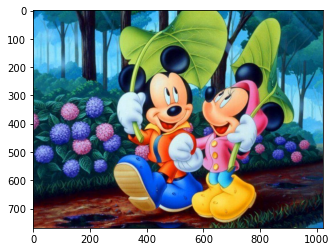

In [2]:
mickey_image = skimage.io.imread("mickey-mouse-girl-friend-image-desktop.jpg")
plt.imshow(mickey_image)

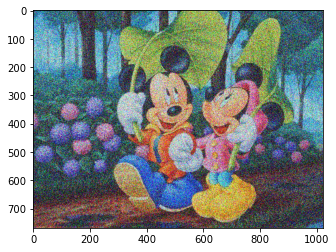

In [3]:
#adding noise
sigma=0.5
noisy_mickey = random_noise(mickey_image,var=sigma**2)
plt.imshow(noisy_mickey)

In [4]:
# To detect the standard deviation of noisy image,
sigma_est = estimate_sigma(noisy_mickey,multichannel=True,average_sigmas=True)
sigma_est

0.3249650590125891

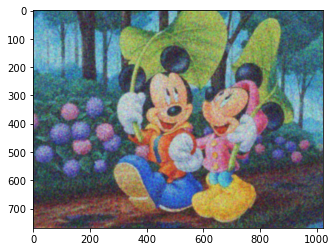

In [5]:
denoise_mickey = denoise_tv_chambolle(noisy_mickey, weight=0.5,multichannel=True)
plt.imshow(denoise_mickey)

In [8]:
denoise_bi_l=denoise_bilateral(noisy_mickey,
                               sigma_color=0.05,
                               sigma_spatial=15,
                               multichannel=True)

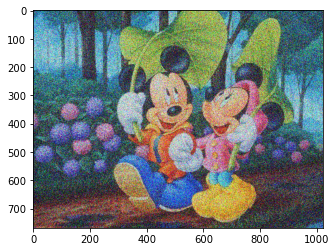

In [9]:
plt.imshow(denoise_bi_l)

In [14]:
denoise_wavelet_img=denoise_wavelet(noisy_mickey,
                                   mode="soft",
                                   multichannel=True,
                                   convert2ycbcr=True)

<ipython-input-14-164f6abbab00>:1: FutureWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  denoise_wavelet_img=denoise_wavelet(noisy_mickey,


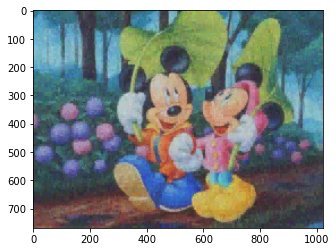

In [15]:
plt.imshow(denoise_wavelet_img)